# Project Objectives
- This project is to assess and evaluate the social performance of Cognizant by leveraging PCA algorithm. We will analyze various social parameters, including diversity and inclusion, employee well-being, retention, stakeholder engagement, and social contributions, to identify distinctive characteristics within the dataset.

- The objective of our process is to predict social scores for new data points using a seamless pipeline established for Cognizant. The procedure involves collecting data from Cognizant ESG reports, standardizing the data to eliminate scale variations, applying PCA transformation for dimensionality reduction, and integrating the principal components into a pre-trained linear regression model. This model has learned relationships between historical data's principal components and social scores. Finally, we can predict social performance in the format of score from range 1-5 (1 stand for poor, 5 stand for excellent)


- **The step-by-step process includes:**
1. **Data Collection:** Gather data from Cognizant ESG reports with 5 predefined parameters and 34 associated metrics, resulting in input data with 34 columns.

2. **Standardization:** Standardize incoming data to ensure all features are on the same scale, using a standardized scaler for consistency with training data.

3. **PCA Transformation:** Apply PCA transformation to reduce dimensionality and capture essential information in the data. Use a pre-trained PCA model on historical data to transform new data into principal components.

4. **Linear Regression Integration:** Integrate principal components into a trained linear regression model that has learned relationships between components and social scores from historical data.

5. **Prediction:** Predict social scores for new data points with the integrated linear regression model, ensuring consistency with the original model's precision and reliability. The predicted social score falls in the range of 1 to 5.

6. **Visualization:** Utilize a heat map to visually represent the relationships between principal components and social scores. Positive correlations are shown in red, while negative correlations are in blue. This helps identify influential PCA components for further analysis.

- The overall objective is to create a robust method for predicting social scores for fresh data points, maintaining the accuracy and consistency established by the original model. This process enables informed decision-making and classification based on the predicted social metric, providing valuable insights into social performance.


# Table of Contents
* [Section 1: Mock Data](#Section-1)
 - [Social Parameter 1: Advancing Diversity & Inclusion (D&I)](#Section-1-1)
 - [Social Parameter 2: Employee Well-Being and Compensation](#Section-1-2)
 - [Social Parameter 3: Employee Retention](#Section-1-3)
 - [Social Parameter 4: Stakeholder Engagement](#Section-1-4)
 - [Social Parameter 5: Social Contribution](#Section-1-5)
 - [Mock Social Score Data](#Section-1-6)
 - [Data Combining](#Section-1-7)

* [Section 2: Data preparation](#Section-2)

* [Section 3: EDA](#Section-3)

* [Section 4: Modeling](#Section-4)
 - [PCA Model](#section-4-1)
   - [Construct a Linear Model](#section-4-1-1)
   - [Model Evaluation](#section-4-1-2)
   - [Model Interpretation](#section-4-1-3)
   - [Future Prediction Pipline on New Data](#section-4-1-4)
   - [Visulization: Heat Mapping](#section-4-1-5)

## Section 1: Mock Data<a class="anchor" id="Section-1"></a>
- The data we have are from the cognizant reports of 2020 - 2022, and we plan to using these data to generate more by using the statistical method, basically is calculated the mean and std from original dataset, to producing more base on normal distribution, which more reliable for our subsequce modeling analysis.

> First, set the number of data points we desire to generate

In [1]:
num_data_points = 50000

## Data Mocking for Social Parameter 1: `Advancing Diversity & Inclusion (D&I)`<a class="anchor" id="Section-1-1"></a>

In [2]:
import pandas as pd

# Data from Cognizant Report of 2020 - 2022
data = {
    'ID': [1, 2, 3],
    'number_of_women': [104300, 123138, 134158],
    'new_female_hires': [0.40, 0.38, 0.378],
    'gender_male_proportion': [0.64, 0.62, 0.617],
    'gender_female_proportion': [0.36, 0.38, 0.383],
    'senior_vice_president_male_proportion': [0.882, 0.869, 0.889],
    'senior_vice_president_female_proportion': [0.118, 0.131, 0.111],
    'senior_manager_male_proportion': [None, 0.832, 0.828],
    'senior_manager_female_proportion': [0.118, 0.167, 0.172],
    'Racial_Asian': [0.68, 0.60, 0.581],
    'Racial_White': [0.23, 0.28, 0.285],
    'Racial_Black': [0.04, 0.06, 0.067],
    'Racial_Hispanic': [0.03, 0.038, 0.043],
    'Racial_Other': [0.02, 0.022, 0.024]
     }

# Create a Pandas DataFrame
df_parameter1 = pd.DataFrame(data)

In [3]:
df_parameter1

,ID,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,Racial_Black,Racial_Hispanic,Racial_Other
0,1,104300,0.400,0.640,0.360,0.882,0.118,NaN,0.118,0.680,0.230,0.040,0.030,0.020
1,2,123138,0.380,0.620,0.380,0.869,0.131,0.832,0.167,0.600,0.280,0.060,0.038,0.022
2,3,134158,0.378,0.617,0.383,0.889,0.111,0.828,0.172,0.581,0.285,0.067,0.043,0.024


> Calculate the Mean and Std in order to using `normal distribution` for generating new data points 

In [4]:
# Calculate the mean and variance for each variable
mean_values = df_parameter1.mean()
variance_values = df_parameter1.var()

# Print the mean and variance for each variable
print("Mean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

Mean Values:
ID                                              2.000000
number_of_women                            120532.000000
new_female_hires                                0.386000
gender_male_proportion                          0.625667
gender_female_proportion                        0.374333
senior_vice_president_male_proportion           0.880000
senior_vice_president_female_proportion         0.120000
senior_manager_male_proportion                  0.830000
senior_manager_female_proportion                0.152333
Racial_Asian                                    0.620333
Racial_White                                    0.265000
Racial_Black                                    0.055667
Racial_Hispanic                                 0.037000
Racial_Other                                    0.022000
dtype: float64

Variance Values:
ID                                         1.000000e+00
number_of_women                            2.279685e+08
new_female_hires                           1

> Mocking data using `normal distribution`

In [5]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(1) 

# Create an empty DataFrame to store the mock data
df_mocked_parameter1 = pd.DataFrame()

# Calculate and generate mock data for each variable
for col in df_parameter1.columns:
    if col != 'ID':
        # Calculate mean and variance for the current variable
        mean_value = mean_values[col]
        variance_value = variance_values[col]
        
        # Generate random data points based on a normal distribution
        mock_data = np.random.normal(mean_value, np.sqrt(variance_value), num_data_points)
        
        # Apply constraints and calculations for specific variables
        if col == 'number_of_women':
            # Ensure number_of_women is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'gender_female_proportion':
            # Calculate gender_female_proportion from gender_male_proportion
            mock_data = 1 - df_mocked_parameter1['gender_male_proportion']
        elif col == 'senior_vice_president_female_proportion':
            # Calculate senior_vice_president_female_proportion from senior_vice_president_male_proportion
            mock_data = 1 - df_mocked_parameter1['senior_vice_president_male_proportion']
        elif col == 'senior_manager_female_proportion':
            # Calculate senior_manager_female_proportion from senior_manager_male_proportion
            mock_data = 1 - df_mocked_parameter1['senior_manager_male_proportion']
        elif col == 'Racial_Other':
            # Calculate Racial_Other from Racial_Asian, Racial_White, Racial_Black, and Racial_Hispanic
            mock_data = 1 - df_mocked_parameter1['Racial_Asian'] - df_mocked_parameter1['Racial_White'] - df_mocked_parameter1['Racial_Black'] - df_mocked_parameter1['Racial_Hispanic']
        
        # Create a DataFrame for the current variable and add it to the mock data DataFrame
        df_mocked_parameter1[col] = mock_data

In [6]:
df_mocked_parameter1

,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,Racial_Black,Racial_Hispanic,Racial_Other
0,145057,0.375125,0.597508,0.402492,0.872020,0.127980,0.830835,0.169165,0.618106,0.268012,0.065201,0.035148,0.013533
1,111295,0.381476,0.633240,0.366760,0.901952,0.098048,0.827114,0.172886,0.556615,0.247188,0.028950,0.029635,0.137613
2,112557,0.388376,0.640463,0.359537,0.872598,0.127402,0.829180,0.170820,0.745660,0.226538,0.048253,0.039113,-0.059564
3,104332,0.370715,0.629780,0.370220,0.895419,0.104581,0.832294,0.167706,0.686513,0.257226,0.049223,0.027845,-0.020807
4,133598,0.383712,0.626466,0.373534,0.874807,0.125193,0.834098,0.165902,0.694832,0.209620,0.068392,0.038375,-0.011219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,115506,0.388474,0.614636,0.385364,0.896249,0.103751,0.829806,0.170194,0.596980,0.227990,0.060571,0.041733,0.072726
49996,118602,0.398493,0.629111,0.370889,0.867082,0.132918,0.829425,0.170575,0.607085,0.256591,0.051675,0.032814,0.051834
49997,111609,0.386988,0.613194,0.386806,0.886678,0.113322,0.830018,0.169982,0.598784,0.282970,0.048563,0.044352,0.025332
49998,134476,0.390186,0.613694,0.386306,0.874281,0.125719,0.826445,0.173555,0.723813,0.213929,0.047978,0.036317,-0.022037


## Data Mocking for Social Parameter 2: `Employee Well-Being and Compensation`<a class="anchor" id="Section-1-2"></a>

In [7]:
import pandas as pd

# Data from Cognizant Report of 2020 - 2022
data = {
    'ID': [1, 2, 3],
    'contribution_expenses_us': [118, 135, 172],
    'contribution_expenses_india': [98, 121, 143],
    'recognized_gratuity_plan_expenses_india': [35, 70, 45],
    'stock_based_compensation_plans': [232, 246, 261],
    'promotion_rate': ['0.09', '0.15', '0.19'],
}

# Create the DataFrame
df_parameter2 = pd.DataFrame(data)

# Convert the 'promotion_rate' column to float
df_parameter2['promotion_rate'] = df_parameter2['promotion_rate'].astype(float)

# Convert the financial columns from million to actual values
financial_columns = ['contribution_expenses_us', 'contribution_expenses_india', 'recognized_gratuity_plan_expenses_india', 'stock_based_compensation_plans']
for col in financial_columns:
    df_parameter2[col] *= 1e6  # Convert million to actual values

In [8]:
df_parameter2

,ID,contribution_expenses_us,contribution_expenses_india,recognized_gratuity_plan_expenses_india,stock_based_compensation_plans,promotion_rate
0,1,118000000.0,98000000.0,35000000.0,232000000.0,0.09
1,2,135000000.0,121000000.0,70000000.0,246000000.0,0.15
2,3,172000000.0,143000000.0,45000000.0,261000000.0,0.19


> Calculate the Mean and Std in order to using `normal distribution` for generating new data points 

In [9]:
# Calculate the mean and variance for each variable
mean_values = df_parameter2.mean()
variance_values = df_parameter2.var()

# Print the mean and variance for each variable
print("Mean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

Mean Values:
ID                                         2.000000e+00
contribution_expenses_us                   1.416667e+08
contribution_expenses_india                1.206667e+08
recognized_gratuity_plan_expenses_india    5.000000e+07
stock_based_compensation_plans             2.463333e+08
promotion_rate                             1.433333e-01
dtype: float64

Variance Values:
ID                                         1.000000e+00
contribution_expenses_us                   7.623333e+14
contribution_expenses_india                5.063333e+14
recognized_gratuity_plan_expenses_india    3.250000e+14
stock_based_compensation_plans             2.103333e+14
promotion_rate                             2.533333e-03
dtype: float64


> Mocking data using `normal distribution`

In [10]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(1) 

# Create an empty DataFrame to store the mock data
df_mocked_parameter2 = pd.DataFrame()

# Calculate and generate mock data for each variable
for col in df_parameter2.columns:
    if col != 'ID':
        # Calculate mean and variance for the current variable
        mean_value = mean_values[col]
        variance_value = variance_values[col]
        
        # Generate random data points based on a normal distribution
        mock_data = np.random.normal(mean_value, np.sqrt(variance_value), num_data_points)
        
        # Create a DataFrame for the current variable and add it to the mock data DataFrame
        df_mocked_parameter2[col] = mock_data

In [11]:
df_mocked_parameter2

,contribution_expenses_us,contribution_expenses_india,recognized_gratuity_plan_expenses_india,stock_based_compensation_plans,promotion_rate
0,1.865155e+08,1.005526e+08,9.399359e+06,2.339586e+08,0.103755
1,1.247758e+08,1.122985e+08,6.091918e+07,2.588571e+08,0.252204
2,1.270836e+08,1.250620e+08,7.133377e+07,2.627156e+08,0.106623
3,1.120416e+08,9.239480e+07,5.593094e+07,2.341964e+08,0.219803
4,1.655609e+08,1.164341e+08,5.115192e+07,2.391109e+08,0.117577
...,...,...,...,...,...
49995,1.324766e+08,1.252435e+08,3.409590e+07,2.411126e+08,0.223919
49996,1.381380e+08,1.437747e+08,5.496667e+07,2.412358e+08,0.079266
49997,1.253494e+08,1.224944e+08,3.201598e+07,2.584235e+08,0.176450
49998,1.671660e+08,1.284083e+08,3.273722e+07,2.463875e+08,0.114969


## Data Mocking for Social Parameter 3: `Employee Retention`<a class="anchor" id="Section-1-3"></a>

In [12]:
import pandas as pd

# Data from Cognizant Report of 2020 - 2022
data = {
    'ID': [1, 2, 3],
    'employee_attrition_rate': ['0.206', '0.308', '0.317'],
    'digital_skills_training_participants': [198000, 150000, 150000],
    'leadership_development': [16500, 17100, 19300],
    'accelerated_development_program_participants': [220, 265, 300],
    'targeted_development_opportunities_offered': [378, 390, 420],
}

# Create the DataFrame
df_parameter3 = pd.DataFrame(data)

# Convert the 'employee_attrition_rate' column to float
df_parameter3['employee_attrition_rate'] = df_parameter3['employee_attrition_rate'].astype(float)

In [13]:
df_parameter3

,ID,employee_attrition_rate,digital_skills_training_participants,leadership_development,accelerated_development_program_participants,targeted_development_opportunities_offered
0,1,0.206,198000,16500,220,378
1,2,0.308,150000,17100,265,390
2,3,0.317,150000,19300,300,420


> Calculate the Mean and Std in order to using `normal distribution` for generating new data points 

In [14]:
# Calculate the mean and variance for each variable
mean_values = df_parameter3.mean()
variance_values = df_parameter3.var()

# Print the mean and variance for each variable
print("Mean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

Mean Values:
ID                                                   2.000000
employee_attrition_rate                              0.277000
digital_skills_training_participants            166000.000000
leadership_development                           17633.333333
accelerated_development_program_participants       261.666667
targeted_development_opportunities_offered         396.000000
dtype: float64

Variance Values:
ID                                              1.000000e+00
employee_attrition_rate                         3.801000e-03
digital_skills_training_participants            7.680000e+08
leadership_development                          2.173333e+06
accelerated_development_program_participants    1.608333e+03
targeted_development_opportunities_offered      4.680000e+02
dtype: float64


> Mocking data using `normal distribution`

In [15]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(1) 

# Create an empty DataFrame to store the mock data
df_mocked_parameter3 = pd.DataFrame()

# Calculate and generate mock data for each variable
for col in df_parameter3.columns:
    if col != 'ID':
        # Calculate mean and variance for the current variable
        mean_value = mean_values[col]
        variance_value = variance_values[col]
        
        # Generate random data points based on a normal distribution
        mock_data = np.random.normal(mean_value, np.sqrt(variance_value), num_data_points)
        
        # Apply constraints and calculations for specific variables
        if col == 'digital_skills_training_participants':
            # Ensure digital_skills_training_participants is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'leadership_development':
            # Ensure leadership_development is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'accelerated_development_program_participants':
            # Ensure accelerated_development_program_participants is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'targeted_development_opportunities_offered':
            # Ensure targeted_development_opportunities_offered is an integer
            mock_data = mock_data.round().astype(int)

        # Create a DataFrame for the current variable and add it to the mock data DataFrame
        df_mocked_parameter3[col] = mock_data

In [16]:
df_mocked_parameter3

,employee_attrition_rate,digital_skills_training_participants,leadership_development,accelerated_development_program_participants,targeted_development_opportunities_offered
0,0.377145,141228,14313,227,379
1,0.239284,155694,18526,296,443
2,0.244437,171413,19378,307,380
3,0.210849,131181,18118,228,429
4,0.330354,160787,17728,242,385
...,...,...,...,...,...
49995,0.256479,171637,16333,247,431
49996,0.269121,194459,18039,248,368
49997,0.240565,168251,16163,295,410
49998,0.333938,175534,16222,262,384


## Data Mocking for Social Parameter 4: `Stakeholder Engagement`<a class="anchor" id="Section-1-4"></a>

In [17]:
import pandas as pd

# Data from Cognizant Report of 2020 - 2022
data = {
    'ID': [1, 2, 3],
    'associate_responses': [208440, 214890, 210000],
    'manager_responses': [8450, 8600, 9000],
    'stakeholder_feedback_average_ratings': [3.6, 3.7, 3.8],
    'voluntary_inclusive_leadership_training_associate_attended': [12800, 13000, 13000],
    'internships_provided_india': [5300, 13000, 26000],
}

# Create the DataFrame
df_parameter4 = pd.DataFrame(data)

# Convert the 'stakeholder_feedback_average_ratings' column to float
df_parameter4['stakeholder_feedback_average_ratings'] = df_parameter4['stakeholder_feedback_average_ratings'].astype(float)

In [18]:
df_parameter4

,ID,associate_responses,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india
0,1,208440,8450,3.6,12800,5300
1,2,214890,8600,3.7,13000,13000
2,3,210000,9000,3.8,13000,26000


> Calculate the Mean and Std in order to using `normal distribution` for generating new data points 

In [19]:
# Calculate the mean and variance for each variable
mean_values = df_parameter4.mean()
variance_values = df_parameter4.var()

# Print the mean and variance for each variable
print("Mean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

Mean Values:
ID                                                                 2.000000
associate_responses                                           211110.000000
manager_responses                                               8683.333333
stakeholder_feedback_average_ratings                               3.700000
voluntary_inclusive_leadership_training_associate_attended     12933.333333
internships_provided_india                                     14766.666667
dtype: float64

Variance Values:
ID                                                            1.000000e+00
associate_responses                                           1.132470e+07
manager_responses                                             8.083333e+04
stakeholder_feedback_average_ratings                          1.000000e-02
voluntary_inclusive_leadership_training_associate_attended    1.333333e+04
internships_provided_india                                    1.094633e+08
dtype: float64


> Mocking data using `normal distribution`

In [20]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(1) 

# Create an empty DataFrame to store the mock data
df_mocked_parameter4 = pd.DataFrame()

# Calculate and generate mock data for each variable
for col in df_parameter4.columns:
    if col != 'ID':
        # Calculate mean and variance for the current variable
        mean_value = mean_values[col]
        variance_value = variance_values[col]
        
        # Generate random data points based on a normal distribution
        mock_data = np.random.normal(mean_value, np.sqrt(variance_value), num_data_points)
        
        # Apply constraints and calculations for specific variables
        if col == 'associate_responses':
            # Ensure associate_responses is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'manager_responses':
            # Ensure manager_responses is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'voluntary_inclusive_leadership_training_associate_attended':
            # Ensure voluntary_inclusive_leadership_training_associate_attended is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'internships_provided_india':
            # Ensure internships_provided_india is an integer
            mock_data = mock_data.round().astype(int)

        # Create a DataFrame for the current variable and add it to the mock data DataFrame
        df_mocked_parameter4[col] = mock_data

In [21]:
df_mocked_parameter4

,associate_responses,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india
0,216576,8429,3.474788,12835,6540
1,209051,8578,3.760569,13033,37397
2,209333,8739,3.818338,13064,7136
3,207499,8326,3.732899,12837,30662
4,214022,8630,3.706390,12876,9413
...,...,...,...,...,...
49995,209990,8741,3.611780,12892,31518
49996,210680,8975,3.727550,12893,1449
49997,209121,8706,3.600243,13030,21651
49998,214218,8781,3.604243,12934,8871


## Data Mocking for Social Parameter 5: `Social Contribution`<a class="anchor" id="Section-1-5"></a>

In [22]:
import pandas as pd

# Data from Cognizant Report of 2020 - 2022
data = {
    'ID': [1, 2, 3],
    'devoted_volunteers': [31000, 35000, 47000],
    'volunteering_hours': [221000, 165000, 150000],
    'trained_associates': [4500, 6000, 7500],
    'grants_and_gifts_awarded': [19.7, 22.1, 23.5],  # These values are in million
    'organizations_awarded': [98, 107, 115],  # These values are not in million
    'acquisitions_capital': [1123, 970, 367],  # These values are in million
}

# Create the DataFrame
df_parameter5 = pd.DataFrame(data)

# Convert the financial columns from million to actual values
financial_columns = ['grants_and_gifts_awarded', 'organizations_awarded', 'acquisitions_capital']
for col in financial_columns:
    df_parameter5[col] *= 1e6  # Convert million to actual values

In [23]:
df_parameter5

,ID,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,1,31000,221000,4500,19700000.0,98000000.0,1.123000e+09
1,2,35000,165000,6000,22100000.0,107000000.0,9.700000e+08
2,3,47000,150000,7500,23500000.0,115000000.0,3.670000e+08


> Calculate the Mean and Std in order to using `normal distribution` for generating new data points 

In [24]:
# Calculate the mean and variance for each variable
mean_values = df_parameter5.mean()
variance_values = df_parameter5.var()

# Print the mean and variance for each variable
print("Mean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

Mean Values:
ID                          2.000000e+00
devoted_volunteers          3.766667e+04
volunteering_hours          1.786667e+05
trained_associates          6.000000e+03
grants_and_gifts_awarded    2.176667e+07
organizations_awarded       1.066667e+08
acquisitions_capital        8.200000e+08
dtype: float64

Variance Values:
ID                          1.000000e+00
devoted_volunteers          6.933333e+07
volunteering_hours          1.400333e+09
trained_associates          2.250000e+06
grants_and_gifts_awarded    3.693333e+12
organizations_awarded       7.233333e+13
acquisitions_capital        1.597590e+17
dtype: float64


> Mocking data using `normal distribution`

In [25]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(1) 

# Create an empty DataFrame to store the mock data
df_mocked_parameter5 = pd.DataFrame()

# Calculate and generate mock data for each variable
for col in df_parameter5.columns:
    if col != 'ID':
        # Calculate mean and variance for the current variable
        mean_value = mean_values[col]
        variance_value = variance_values[col]
        
        # Generate random data points based on a normal distribution
        mock_data = np.random.normal(mean_value, np.sqrt(variance_value), num_data_points)
        
        # Apply constraints and calculations for specific variables
        if col == 'devoted_volunteers':
            # Ensure devoted_volunteers is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'volunteering_hours':
            # Ensure volunteering_hours is an integer
            mock_data = mock_data.round().astype(int)
        elif col == 'trained_associates':
            # Ensure trained_associates is an integer
            mock_data = mock_data.round().astype(int)

        # Create a DataFrame for the current variable and add it to the mock data DataFrame
        df_mocked_parameter5[col] = mock_data

In [26]:
df_mocked_parameter5

,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,51192,145217,2622,2.012687e+07,9.997892e+07,5.687713e+08
1,32573,164750,6909,2.342621e+07,1.250631e+08,8.782488e+08
2,33269,185976,7775,2.393752e+07,1.004635e+08,1.207291e+09
3,28732,131650,6493,2.015838e+07,1.195882e+08,1.409414e+09
4,44873,171628,6096,2.080961e+07,1.023146e+08,4.204980e+08
...,...,...,...,...,...,...
49995,34895,186278,4677,2.107486e+07,1.202836e+08,1.557628e+08
49996,36603,217096,6413,2.109118e+07,9.584086e+07,6.291547e+08
49997,32746,181706,4504,2.336875e+07,1.122626e+08,9.236507e+08
49998,45357,191541,4564,2.177384e+07,1.018738e+08,9.907271e+08


## Mock Social Score Data <a class="anchor" id="Section-1-6"></a>

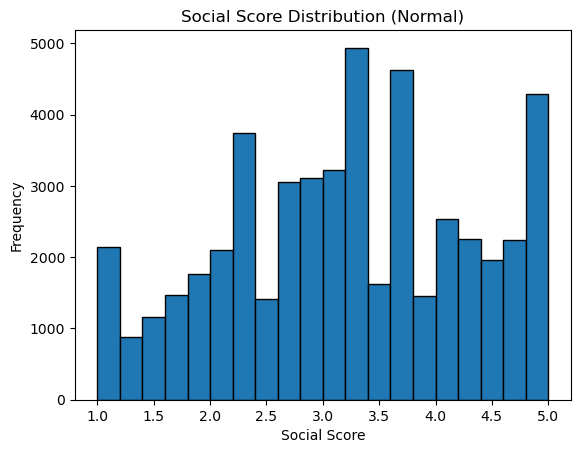

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(1)

# Generate random social_score values with a normal distribution
mean = 3.2  # Mean value
std_dev = 1.2  # Standard deviation
social_scores = np.random.normal(mean, std_dev, num_data_points).clip(1.0, 5.0).round(1)

# Create a DataFrame
df_score = pd.DataFrame({'social_score': social_scores})

# Plot a histogram
plt.hist(df_score['social_score'], bins= 20, edgecolor='k')
plt.title('Social Score Distribution (Normal)')
plt.xlabel('Social Score')
plt.ylabel('Frequency')
plt.show()

## Data Combining <a class="anchor" id="Section-1-7"></a>

In [28]:
# Combine the DataFrames by adding all the columns
social_mocked_data = pd.concat([df_score, df_mocked_parameter1, df_mocked_parameter2, df_mocked_parameter3, df_mocked_parameter4, df_mocked_parameter5], axis=1)

In [29]:
social_mocked_data.head()

,social_score,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,5.0,145057,0.375125,0.597508,0.402492,0.872020,0.127980,0.830835,0.169165,0.618106,...,8429,3.474788,12835,6540,51192,145217,2622,2.012687e+07,9.997892e+07,5.687713e+08
1,2.5,111295,0.381476,0.633240,0.366760,0.901952,0.098048,0.827114,0.172886,0.556615,...,8578,3.760569,13033,37397,32573,164750,6909,2.342621e+07,1.250631e+08,8.782488e+08
2,2.6,112557,0.388376,0.640463,0.359537,0.872598,0.127402,0.829180,0.170820,0.745660,...,8739,3.818338,13064,7136,33269,185976,7775,2.393752e+07,1.004635e+08,1.207291e+09
3,1.9,104332,0.370715,0.629780,0.370220,0.895419,0.104581,0.832294,0.167706,0.686513,...,8326,3.732899,12837,30662,28732,131650,6493,2.015838e+07,1.195882e+08,1.409414e+09
4,4.2,133598,0.383712,0.626466,0.373534,0.874807,0.125193,0.834098,0.165902,0.694832,...,8630,3.706390,12876,9413,44873,171628,6096,2.080961e+07,1.023146e+08,4.204980e+08


In [30]:
social_mocked_data.to_excel('social_mocked_data.xlsx', index=False)

## Section 2: Data preparation<a class="anchor" id="Section-2"></a>

> Import packages and data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the mock data
df = pd.read_excel('social_mocked_data.xlsx')

In [33]:
df.head()

,social_score,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,5.0,145057,0.375125,0.597508,0.402492,0.872020,0.127980,0.830835,0.169165,0.618106,...,8429,3.474788,12835,6540,51192,145217,2622,2.012687e+07,9.997892e+07,5.687713e+08
1,2.5,111295,0.381476,0.633240,0.366760,0.901952,0.098048,0.827114,0.172886,0.556615,...,8578,3.760569,13033,37397,32573,164750,6909,2.342621e+07,1.250631e+08,8.782488e+08
2,2.6,112557,0.388376,0.640463,0.359537,0.872598,0.127402,0.829180,0.170820,0.745660,...,8739,3.818338,13064,7136,33269,185976,7775,2.393752e+07,1.004635e+08,1.207291e+09
3,1.9,104332,0.370715,0.629780,0.370220,0.895419,0.104581,0.832294,0.167706,0.686513,...,8326,3.732899,12837,30662,28732,131650,6493,2.015838e+07,1.195882e+08,1.409414e+09
4,4.2,133598,0.383712,0.626466,0.373534,0.874807,0.125193,0.834098,0.165902,0.694832,...,8630,3.706390,12876,9413,44873,171628,6096,2.080961e+07,1.023146e+08,4.204980e+08


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   social_score                                                50000 non-null  float64
 1   number_of_women                                             50000 non-null  int64  
 2   new_female_hires                                            50000 non-null  float64
 3   gender_male_proportion                                      50000 non-null  float64
 4   gender_female_proportion                                    50000 non-null  float64
 5   senior_vice_president_male_proportion                       50000 non-null  float64
 6   senior_vice_president_female_proportion                     50000 non-null  float64
 7   senior_manager_male_proportion                              50000 non-null  float64
 

> **Create group for each parameters:**

- `Social Parameter 1`: Advancing Diversity & Inclusion (D&I)

- `Social Parameter 2`: Employee Well-Being and Compensation

- `Social Parameter 3`: Employee Retention

- `Social Parameter 4`: Stakeholder Engagement

- `Social Parameter 5`: Social Contribution

In [35]:
df.columns

Index(['social_score', 'number_of_women', 'new_female_hires',
       'gender_male_proportion', 'gender_female_proportion',
       'senior_vice_president_male_proportion',
       'senior_vice_president_female_proportion',
       'senior_manager_male_proportion', 'senior_manager_female_proportion',
       'Racial_Asian', 'Racial_White', 'Racial_Black', 'Racial_Hispanic',
       'Racial_Other', 'contribution_expenses_us',
       'contribution_expenses_india',
       'recognized_gratuity_plan_expenses_india',
       'stock_based_compensation_plans', 'promotion_rate',
       'employee_attrition_rate', 'digital_skills_training_participants',
       'leadership_development',
       'accelerated_development_program_participants',
       'targeted_development_opportunities_offered', 'associate_responses',
       'manager_responses', 'stakeholder_feedback_average_ratings',
       'voluntary_inclusive_leadership_training_associate_attended',
       'internships_provided_india', 'devoted_volunteer

In [36]:
Parameter_1 = ['number_of_women','new_female_hires','gender_male_proportion',
               'gender_female_proportion','senior_vice_president_male_proportion',
               'senior_vice_president_female_proportion','senior_manager_male_proportion',
               'senior_manager_female_proportion','Racial_Asian','Racial_White',
               'Racial_Black', 'Racial_Hispanic','Racial_Other']

Parameter_2 = ['contribution_expenses_us','contribution_expenses_india',
               'recognized_gratuity_plan_expenses_india',
               'stock_based_compensation_plans','promotion_rate']

Parameter_3 = ['employee_attrition_rate','digital_skills_training_participants',
               'leadership_development','accelerated_development_program_participants',
               'targeted_development_opportunities_offered']

Parameter_4 = ['associate_responses','manager_responses','stakeholder_feedback_average_ratings',
               'voluntary_inclusive_leadership_training_associate_attended','internships_provided_india']

Parameter_5 = ['devoted_volunteers','volunteering_hours','trained_associates', 
               'grants_and_gifts_awarded','organizations_awarded','acquisitions_capital']

> Since the data are mocked, and follow a normal distribution, for better to analysis, we need to split the data into train and test set, using df to split

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

# Check the shape of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (35000, 35)
Testing set shape: (15000, 35)


In [38]:
df_1 = train_df[Parameter_1]
df_2 = train_df[Parameter_2]
df_3 = train_df[Parameter_3]
df_4 = train_df[Parameter_4]
df_5 = train_df[Parameter_5]

## Section 3: EDA<a class="anchor" id="Section-3"></a>

> `Social Parameter 1`: Advancing Diversity & Inclusion (D&I)

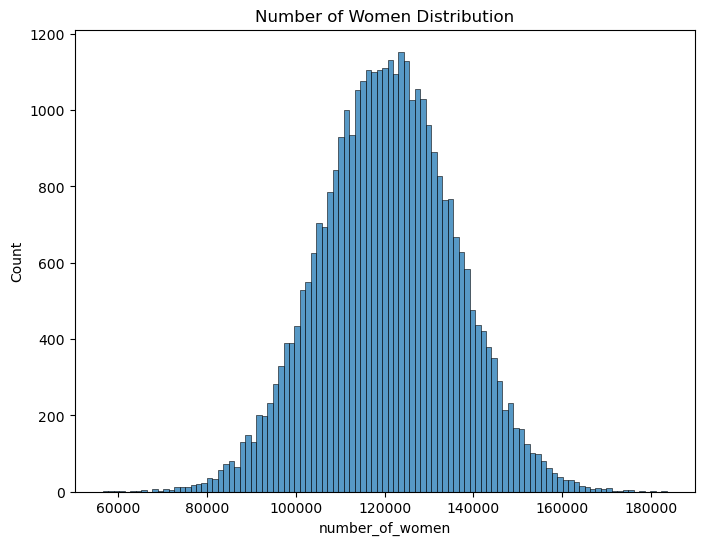

In [39]:
plt.figure(figsize = (8,6))
sns.histplot(df_1['number_of_women'])
plt.title('Number of Women Distribution')
plt.show()

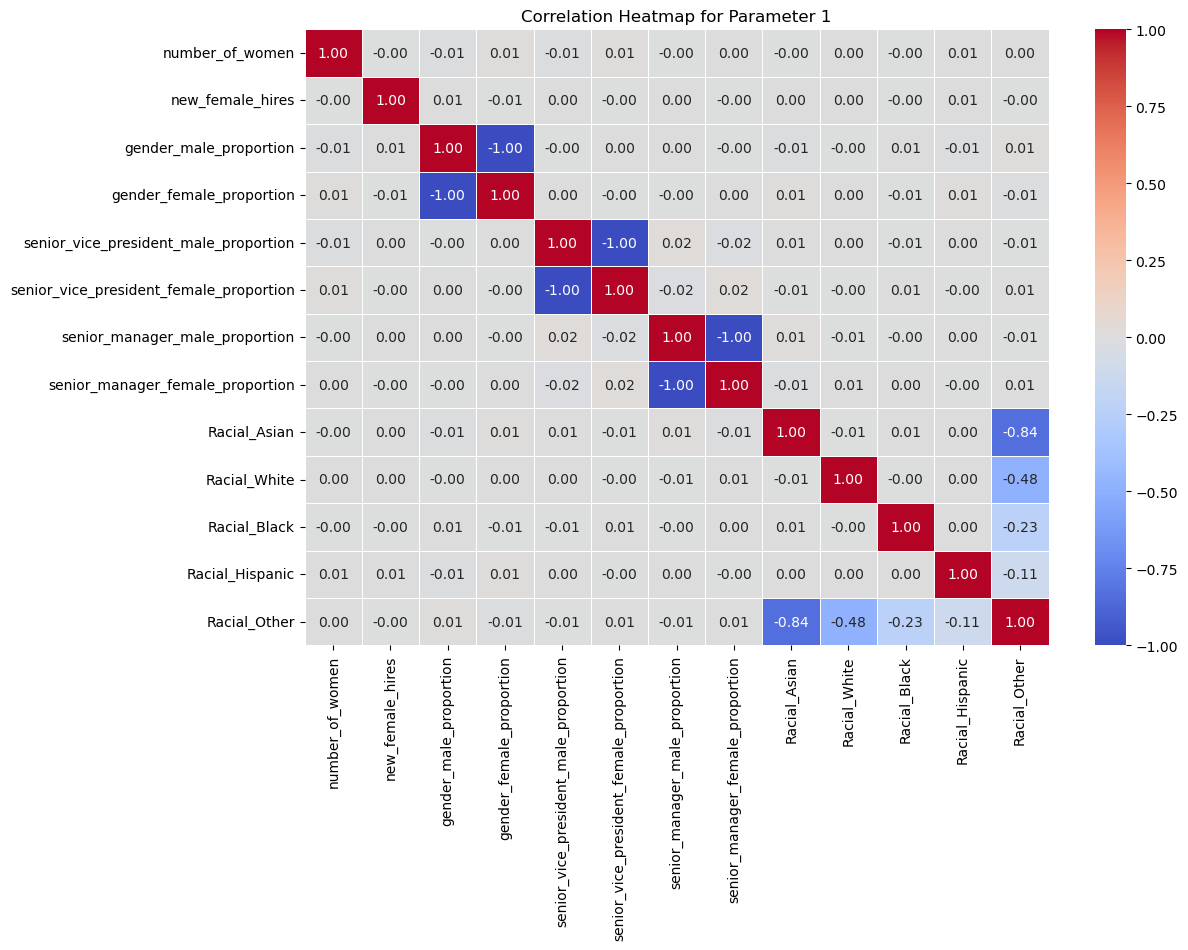

In [40]:
# Calculate the correlation matrix
corr_matrix = df_1.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Parameter 1")
plt.show()

> `Social Parameter 2`: Employee Well-Being and Compensation

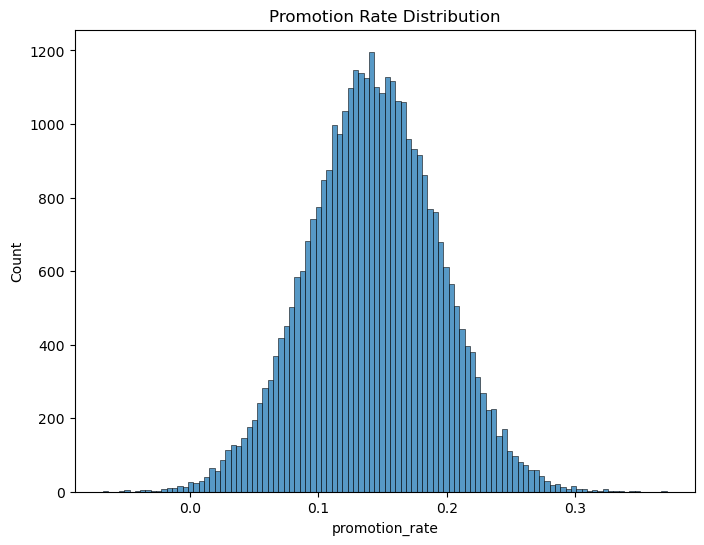

In [41]:
plt.figure(figsize = (8,6))
sns.histplot(df_2['promotion_rate'])
plt.title('Promotion Rate Distribution')
plt.show()

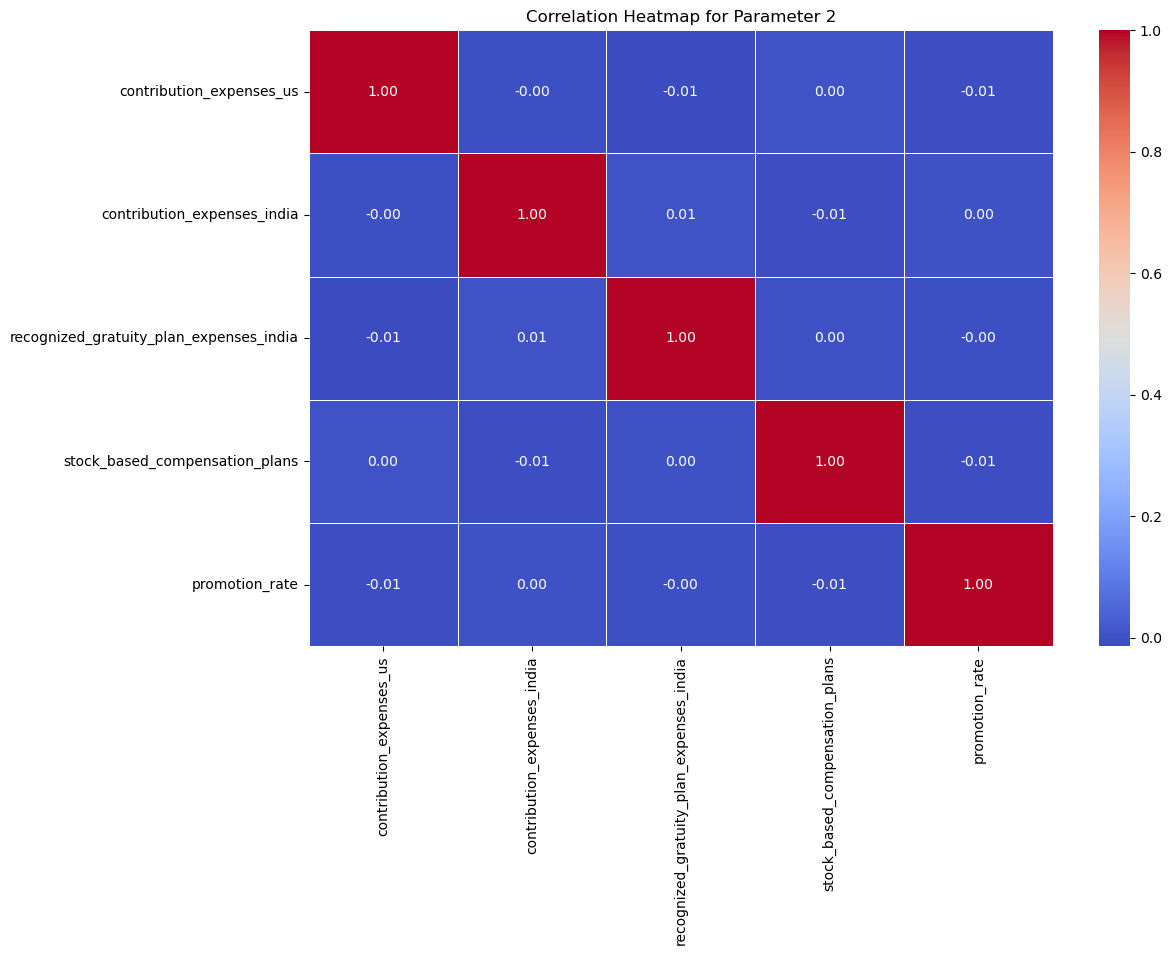

In [42]:
# Calculate the correlation matrix
corr_matrix = df_2.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Parameter 2")
plt.show()

> `Social Parameter 3`: Employee Retention

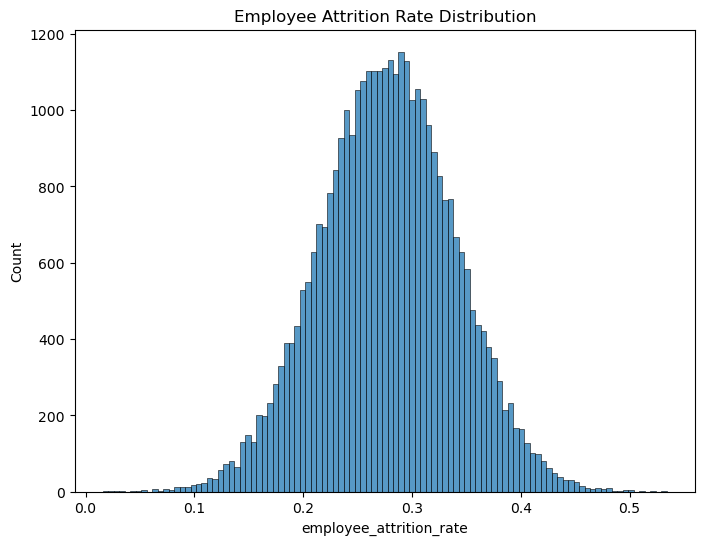

In [43]:
plt.figure(figsize = (8,6))
sns.histplot(df_3['employee_attrition_rate'])
plt.title('Employee Attrition Rate Distribution')
plt.show()

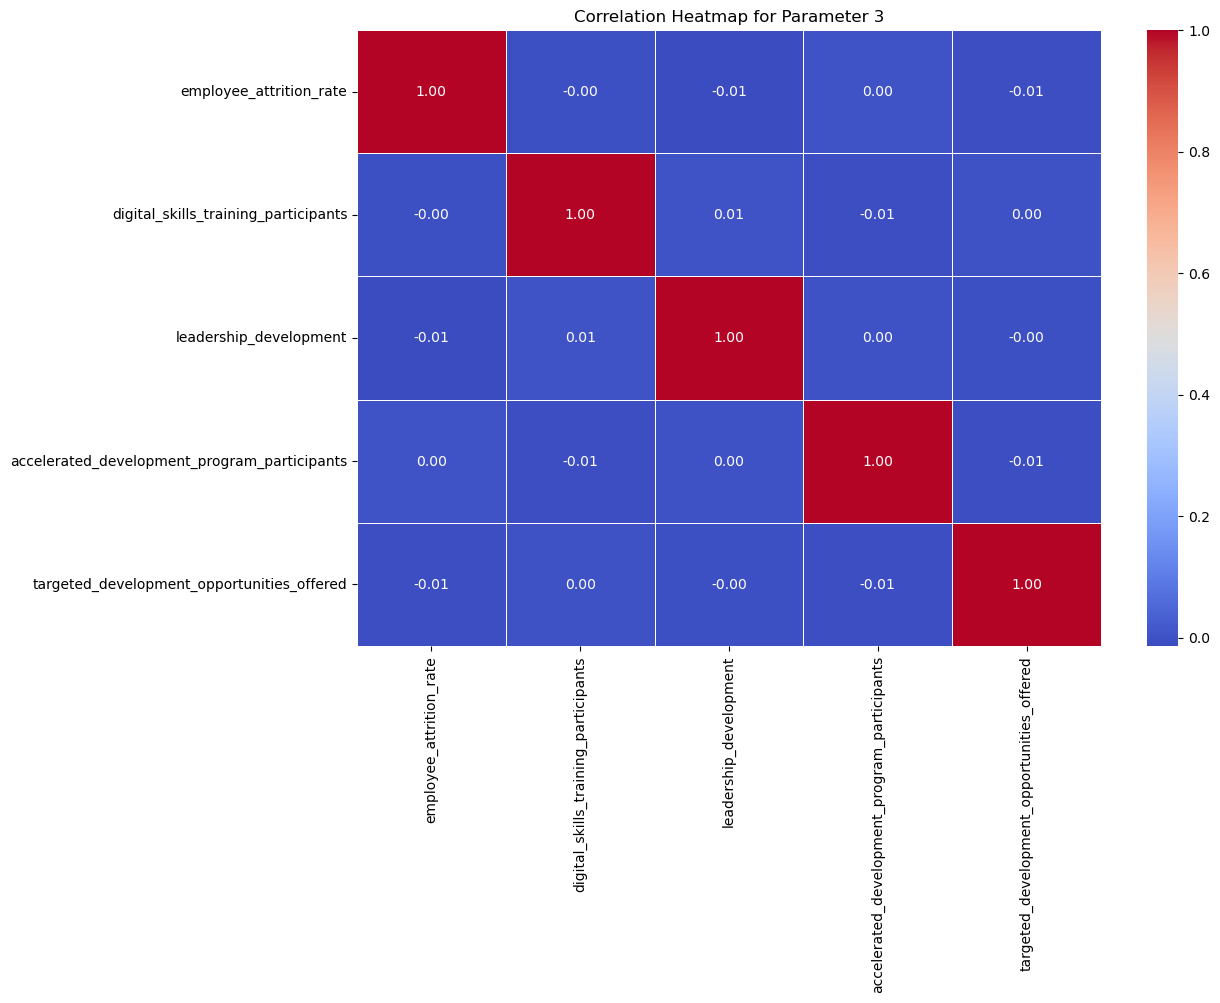

In [44]:
# Calculate the correlation matrix
corr_matrix = df_3.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Parameter 3")
plt.show()

> `Social Parameter 4`: Stakeholder Engagement

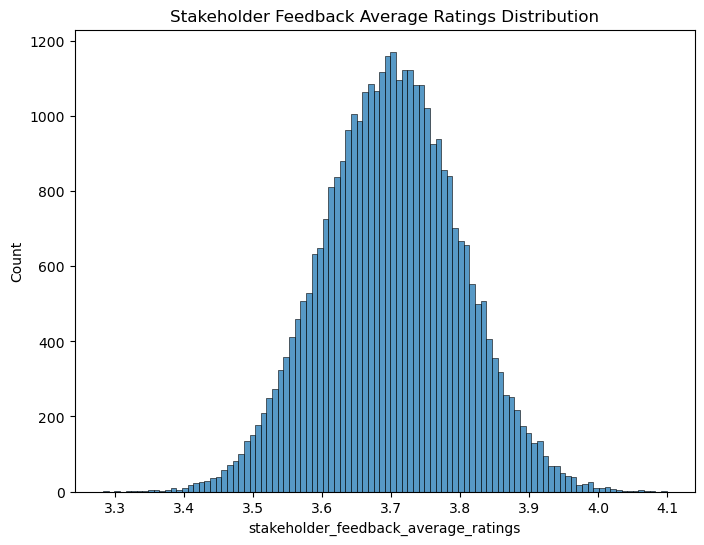

In [45]:
plt.figure(figsize = (8,6))
sns.histplot(df_4['stakeholder_feedback_average_ratings'])
plt.title('Stakeholder Feedback Average Ratings Distribution')
plt.show()

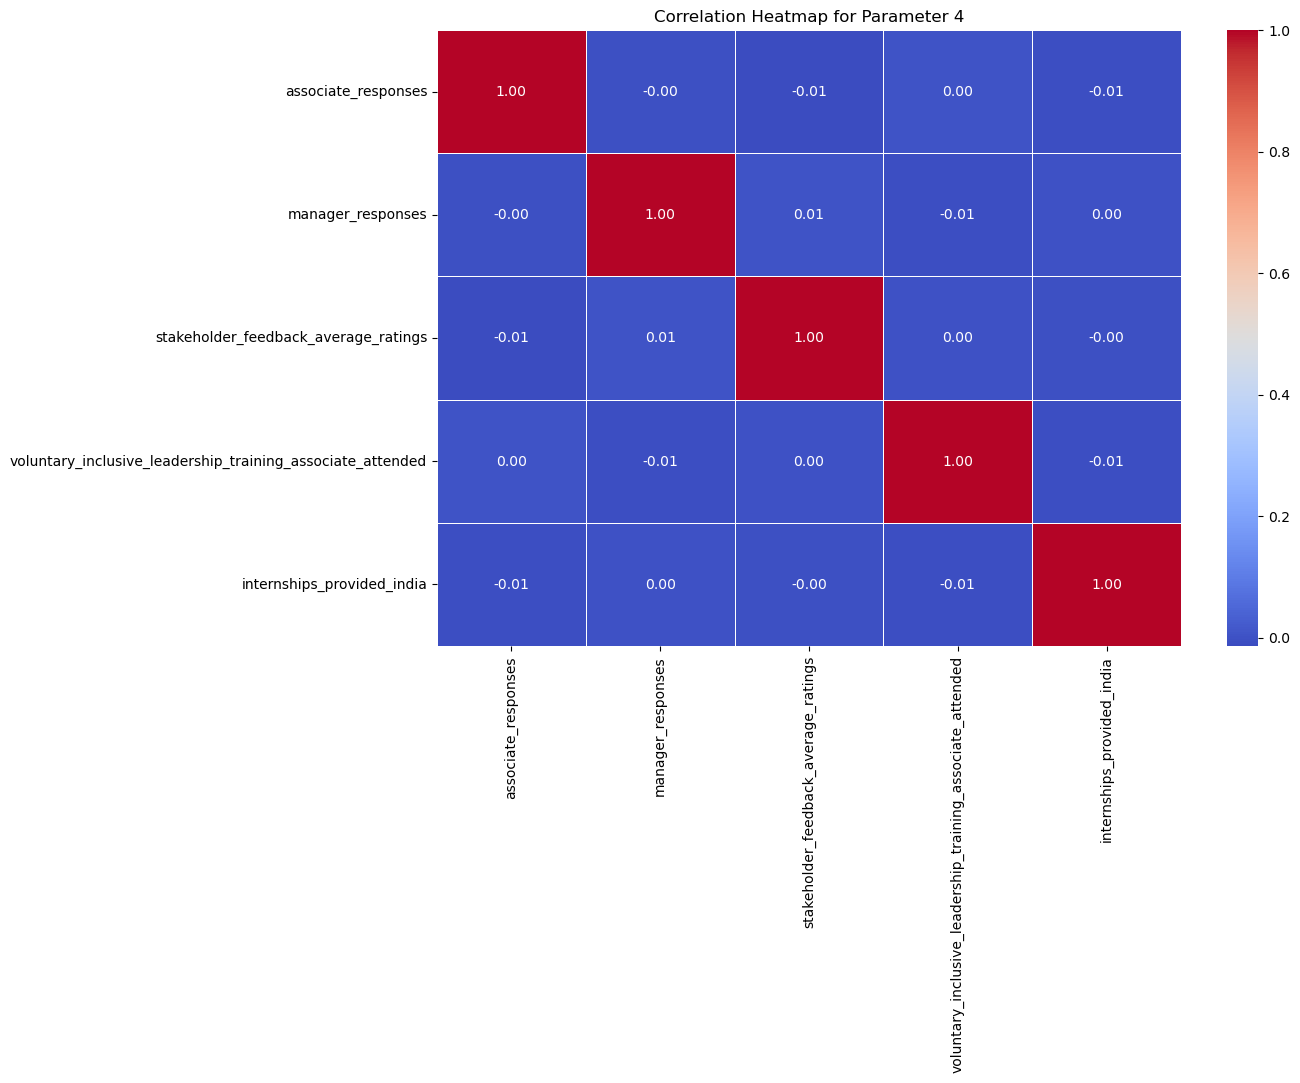

In [46]:
# Calculate the correlation matrix
corr_matrix = df_4.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Parameter 4")
plt.show()

> `Social Parameter 5`: Social Contribution

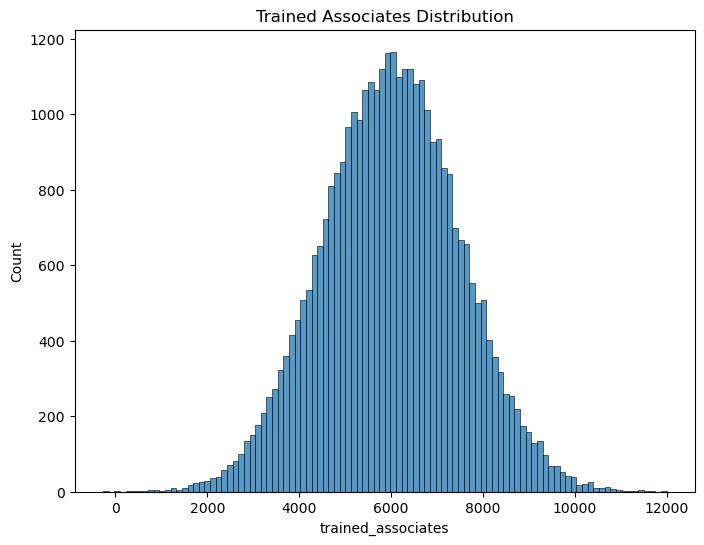

In [47]:
plt.figure(figsize = (8,6))
sns.histplot(df_5['trained_associates'])
plt.title('Trained Associates Distribution')
plt.show()

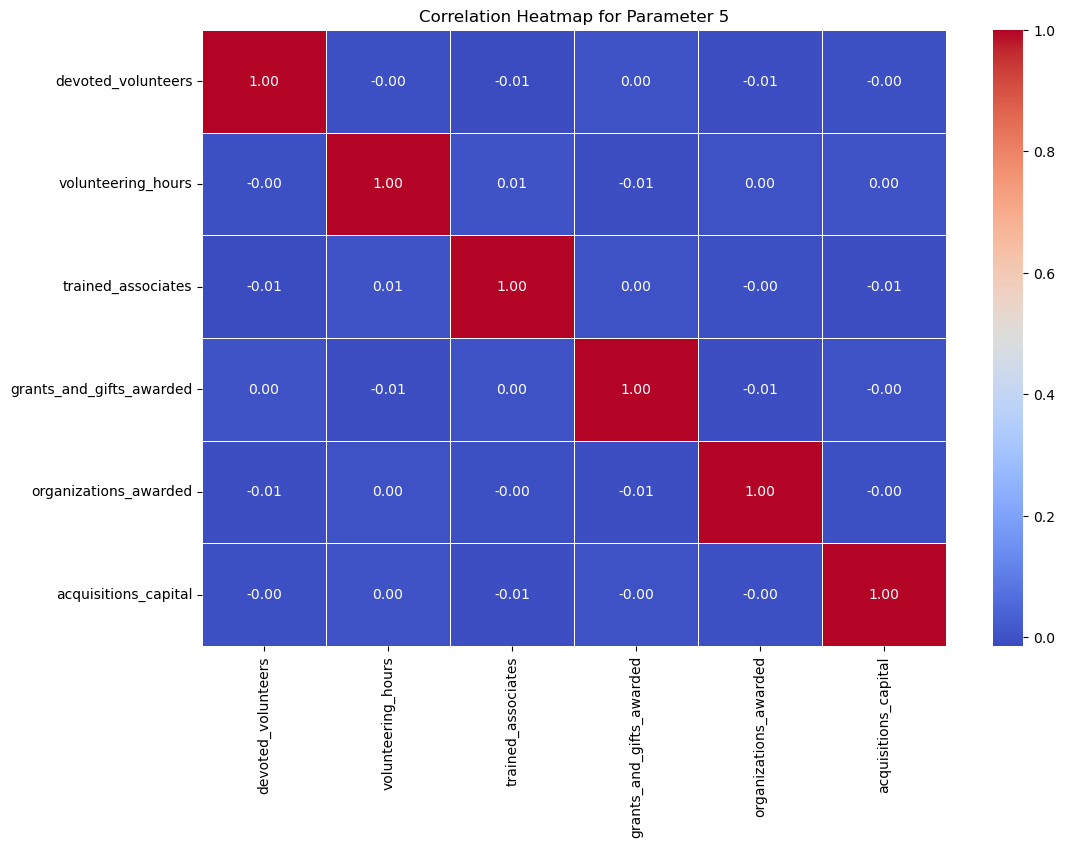

In [48]:
# Calculate the correlation matrix
corr_matrix = df_5.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Parameter 5")
plt.show()

## Section 4: Modeling<a class="anchor" id="Section-4"></a>

> **PCA Model**<a class="anchor" id="section-4-1"></a>

> Data preperation

In [49]:
# Load the mock data
df = pd.read_excel('social_mocked_data.xlsx')

In [50]:
df.head()

,social_score,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,5.0,145057,0.375125,0.597508,0.402492,0.872020,0.127980,0.830835,0.169165,0.618106,...,8429,3.474788,12835,6540,51192,145217,2622,2.012687e+07,9.997892e+07,5.687713e+08
1,2.5,111295,0.381476,0.633240,0.366760,0.901952,0.098048,0.827114,0.172886,0.556615,...,8578,3.760569,13033,37397,32573,164750,6909,2.342621e+07,1.250631e+08,8.782488e+08
2,2.6,112557,0.388376,0.640463,0.359537,0.872598,0.127402,0.829180,0.170820,0.745660,...,8739,3.818338,13064,7136,33269,185976,7775,2.393752e+07,1.004635e+08,1.207291e+09
3,1.9,104332,0.370715,0.629780,0.370220,0.895419,0.104581,0.832294,0.167706,0.686513,...,8326,3.732899,12837,30662,28732,131650,6493,2.015838e+07,1.195882e+08,1.409414e+09
4,4.2,133598,0.383712,0.626466,0.373534,0.874807,0.125193,0.834098,0.165902,0.694832,...,8630,3.706390,12876,9413,44873,171628,6096,2.080961e+07,1.023146e+08,4.204980e+08


In [51]:
model_pca = df

In [52]:
model_pca.head()

,social_score,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,5.0,145057,0.375125,0.597508,0.402492,0.872020,0.127980,0.830835,0.169165,0.618106,...,8429,3.474788,12835,6540,51192,145217,2622,2.012687e+07,9.997892e+07,5.687713e+08
1,2.5,111295,0.381476,0.633240,0.366760,0.901952,0.098048,0.827114,0.172886,0.556615,...,8578,3.760569,13033,37397,32573,164750,6909,2.342621e+07,1.250631e+08,8.782488e+08
2,2.6,112557,0.388376,0.640463,0.359537,0.872598,0.127402,0.829180,0.170820,0.745660,...,8739,3.818338,13064,7136,33269,185976,7775,2.393752e+07,1.004635e+08,1.207291e+09
3,1.9,104332,0.370715,0.629780,0.370220,0.895419,0.104581,0.832294,0.167706,0.686513,...,8326,3.732899,12837,30662,28732,131650,6493,2.015838e+07,1.195882e+08,1.409414e+09
4,4.2,133598,0.383712,0.626466,0.373534,0.874807,0.125193,0.834098,0.165902,0.694832,...,8630,3.706390,12876,9413,44873,171628,6096,2.080961e+07,1.023146e+08,4.204980e+08


In [53]:
model_pca.isna().sum()

social_score                                                  0
number_of_women                                               0
new_female_hires                                              0
gender_male_proportion                                        0
gender_female_proportion                                      0
senior_vice_president_male_proportion                         0
senior_vice_president_female_proportion                       0
senior_manager_male_proportion                                0
senior_manager_female_proportion                              0
Racial_Asian                                                  0
Racial_White                                                  0
Racial_Black                                                  0
Racial_Hispanic                                               0
Racial_Other                                                  0
contribution_expenses_us                                      0
contribution_expenses_india             

> Separate the target variable from the features

In [54]:
x = model_pca.drop(columns=['social_score'])  # Features
y = model_pca['social_score']  # Target variable

> Standardize

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the DataFrame
model_pca = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

model_pca.head()

,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,0.697212,0.409548,0.235931,0.764069,0.390807,0.609193,0.562920,0.437080,0.490819,0.489250,...,0.409568,0.235931,0.371608,0.390813,0.697215,0.409549,0.235956,0.371213,0.390807,0.411158
1,0.431051,0.471820,0.585455,0.414545,0.728715,0.271285,0.397624,0.602376,0.346756,0.412343,...,0.472094,0.585455,0.578288,0.728712,0.431055,0.471820,0.585487,0.578273,0.728715,0.504993
2,0.441000,0.539488,0.656110,0.343890,0.397335,0.602665,0.489402,0.510598,0.789654,0.336079,...,0.539656,0.656110,0.610647,0.397339,0.441004,0.539488,0.656095,0.610362,0.397335,0.604761
3,0.376159,0.366298,0.551613,0.448387,0.654963,0.345037,0.627714,0.372286,0.651085,0.449417,...,0.366345,0.551613,0.373695,0.654961,0.376147,0.366298,0.551570,0.373191,0.654963,0.666046
4,0.606876,0.493746,0.519191,0.480809,0.422270,0.577730,0.707840,0.292160,0.670573,0.273596,...,0.493915,0.519191,0.414405,0.422273,0.606885,0.493747,0.519201,0.414061,0.422270,0.366201


> Data Split

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(model_pca, y, test_size=0.3, random_state=123)

# Check the shape of the training and testing sets
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (35000, 34)
Testing set shape: (15000, 34)


> Model Training

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

> Determine the number of components when cumulative explained variance exceed 90%

In [58]:
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
n_components

8

> Here is the graph shows the Explained Variance vs. Number of Components

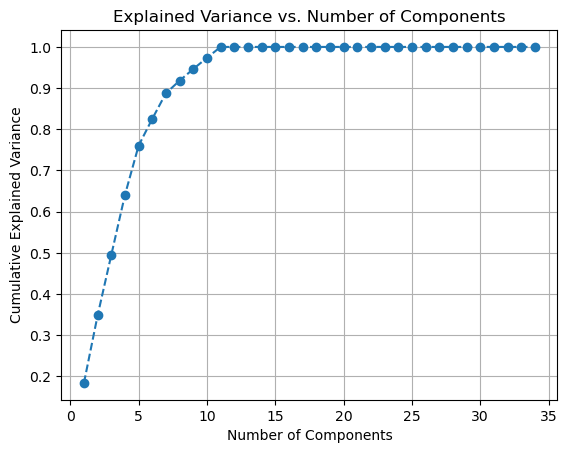

In [59]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

> Here is the Scree Plot for Each Component Explained Variance

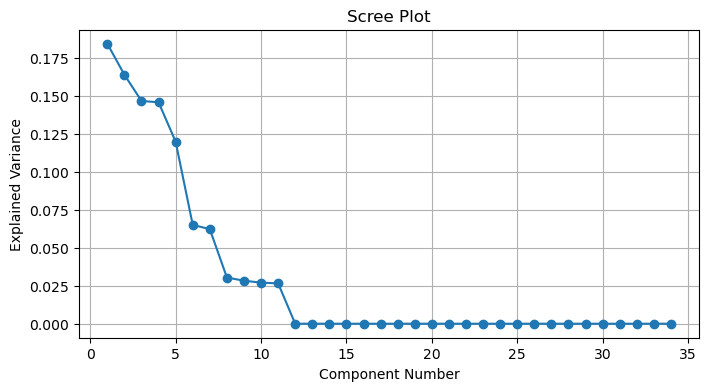

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

> Parallel Analysis Scree Plot

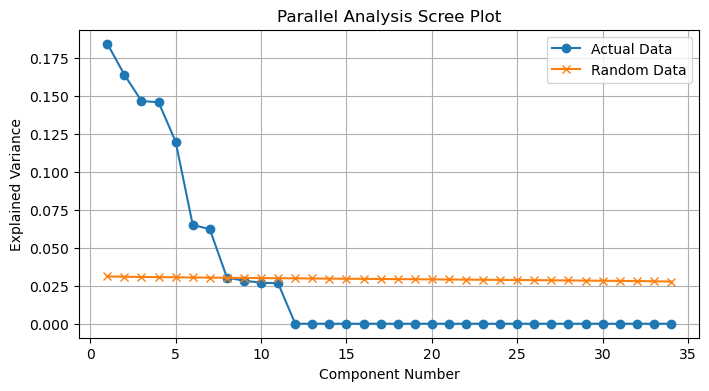

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Number of random data simulations
num_simulations = 1000

# List to store explained variance from random data simulations
explained_variance_random = []

# Perform simulations
for _ in range(num_simulations):
    # Simulate random data
    random_data = np.random.rand(x_train.shape[0], x_train.shape[1])

    # Apply PCA to random data
    pca = PCA()
    pca.fit(random_data)

    # Append explained variance to the list
    explained_variance_random.append(pca.explained_variance_ratio_)

# Calculate the mean explained variance from random data simulations
mean_explained_variance_random = np.mean(explained_variance_random, axis=0)

# Create Parallel Analysis Scree Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Actual Data')
plt.plot(range(1, len(mean_explained_variance_random) + 1), mean_explained_variance_random, marker='x', label='Random Data')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.title('Parallel Analysis Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

> Base on above analysis, we will choose 8 components to conduct further investigation

In [62]:
from sklearn.decomposition import PCA

# Create a PCA object with 8 components
pca = PCA(n_components=8)

# Fit the PCA model on the training data
pca.fit(x_train)

# Transform the training data to the first 8 principal components
train_pca = pca.transform(x_train)

# Transform the test data using the same PCA
test_pca = pca.transform(x_test)

Create a DataFrame named train_pca_df with 8 columns, each representing one of the principal components (PC1, PC2, ..., PC8) for the train dataset. 

In [63]:
# Create a DataFrame with the 8 principal components
train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(8)])

# Display the DataFrame
train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.074582,0.172897,-0.025336,0.179870,-0.133610,0.029902,-0.162070,0.074085
1,0.494275,-0.386590,-0.205481,0.140778,-0.093379,-0.244149,0.099051,0.024069
2,-0.498916,-0.114051,-0.036557,-0.168470,0.208480,0.308629,-0.022257,-0.035519
3,0.008021,-0.099306,0.279579,0.125628,0.759911,-0.057955,-0.416302,-0.143817
4,0.139633,-0.038607,0.425187,-0.169215,-0.415047,-0.029832,0.223072,-0.153895


Create a DataFrame named test_pca_df with 8 columns, each representing one of the principal components (PC1, PC2, ..., PC8) for the test dataset. 

In [64]:
# Create a DataFrame with the 8 principal components for the test data
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(8)])

# Display the DataFrame
test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.375568,-0.051846,-0.467331,0.514449,0.063777,-0.210652,0.144060,-0.173174
1,-0.121291,0.511814,0.323120,0.070499,0.137034,0.101511,-0.208245,0.101703
2,0.075515,-0.069263,0.108984,-0.301103,0.303159,-0.088018,0.023485,-0.078108
3,0.348155,-0.353148,-0.281711,-0.036875,0.087957,-0.013225,-0.201041,-0.117079
4,-0.402818,0.236283,0.183733,-0.283295,-0.189669,-0.014955,0.004993,0.035904


> Contribution chart for 8 components

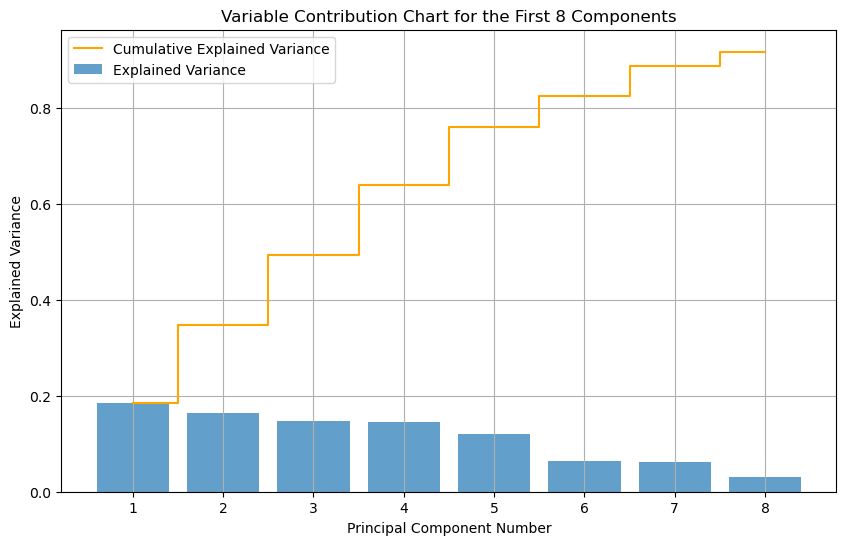

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of component numbers
components = np.arange(1, 9)  # Use the first 8 components

# Get the explained variance for the first 8 components
explained_variance = pca.explained_variance_ratio_[:8]
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance, alpha=0.7, align='center', label='Explained Variance')
plt.step(components, cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='orange')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance')
plt.title('Variable Contribution Chart for the First 8 Components')
plt.legend(loc='upper left')
plt.grid()

# Show the plot
plt.show()

> Get the variable contributions for each component

In [66]:
variable_contributions = pca.components_

# Create a DataFrame for better visualization
import pandas as pd

components = [f'Component {i}' for i in range(1, variable_contributions.shape[0] + 1)]
variables = x_train.columns

# Create a DataFrame with components as rows and variables as columns
variable_contribution_df = pd.DataFrame(variable_contributions, columns=variables, index=components)

# The variable_contribution_df DataFrame contains the contributions of each variable to each component
variable_contribution_df

,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
Component 1,0.026685,-0.011149,-0.407289,0.407289,0.008514,-0.008514,-0.001325,0.001325,0.005216,0.001380,...,-0.011155,-0.407289,0.000026,0.008514,0.026685,-0.011149,-0.407269,0.000024,0.008514,0.004533
Component 2,-0.033705,0.008460,0.006474,-0.006474,0.406757,-0.406757,0.012529,-0.012529,0.005343,0.002374,...,0.008462,0.006474,-0.015085,0.406757,-0.033706,0.008460,0.006474,-0.015100,0.406757,-0.001485
Component 3,0.298816,-0.329983,0.024380,-0.024380,0.026446,-0.026446,-0.001755,0.001755,-0.003081,0.000878,...,-0.330014,0.024380,0.017928,0.026446,0.298820,-0.329983,0.024379,0.017948,0.026446,-0.003599
Component 4,-0.329866,-0.301026,-0.011505,0.011505,-0.017173,0.017173,-0.001051,0.001051,0.001099,-0.001492,...,-0.301054,-0.011505,0.007893,-0.017174,-0.329870,-0.301026,-0.011505,0.007895,-0.017173,0.001160
Component 5,-0.006563,0.016908,-0.000510,0.000510,0.011787,-0.011787,-0.014111,0.014111,-0.007655,-0.003945,...,0.016912,-0.000510,0.499159,0.011787,-0.006563,0.016908,-0.000510,0.499478,0.011787,-0.000622
Component 6,-0.000928,0.001178,0.000415,-0.000415,0.007248,-0.007248,-0.700270,0.700270,-0.090217,-0.025010,...,0.001179,0.000415,-0.011143,0.007248,-0.000927,0.001178,0.000416,-0.011148,0.007248,-0.003194
Component 7,-0.000992,0.000439,-0.003080,0.003080,0.001951,-0.001951,0.095769,-0.095769,-0.616173,-0.265355,...,0.000439,-0.003080,-0.005609,0.001951,-0.000992,0.000439,-0.003079,-0.005599,0.001951,0.001616
Component 8,0.001103,-0.000781,0.001948,-0.001948,0.000674,-0.000674,-0.001390,0.001390,-0.053091,0.097860,...,-0.000784,0.001948,0.000388,0.000674,0.001102,-0.000781,0.001947,0.000408,0.000674,0.993370


Here is the plot for each component of variable contribution, and for each graph we only show the first 6 variables of most contribution, also creating a threshold line of 10% which good for observation.

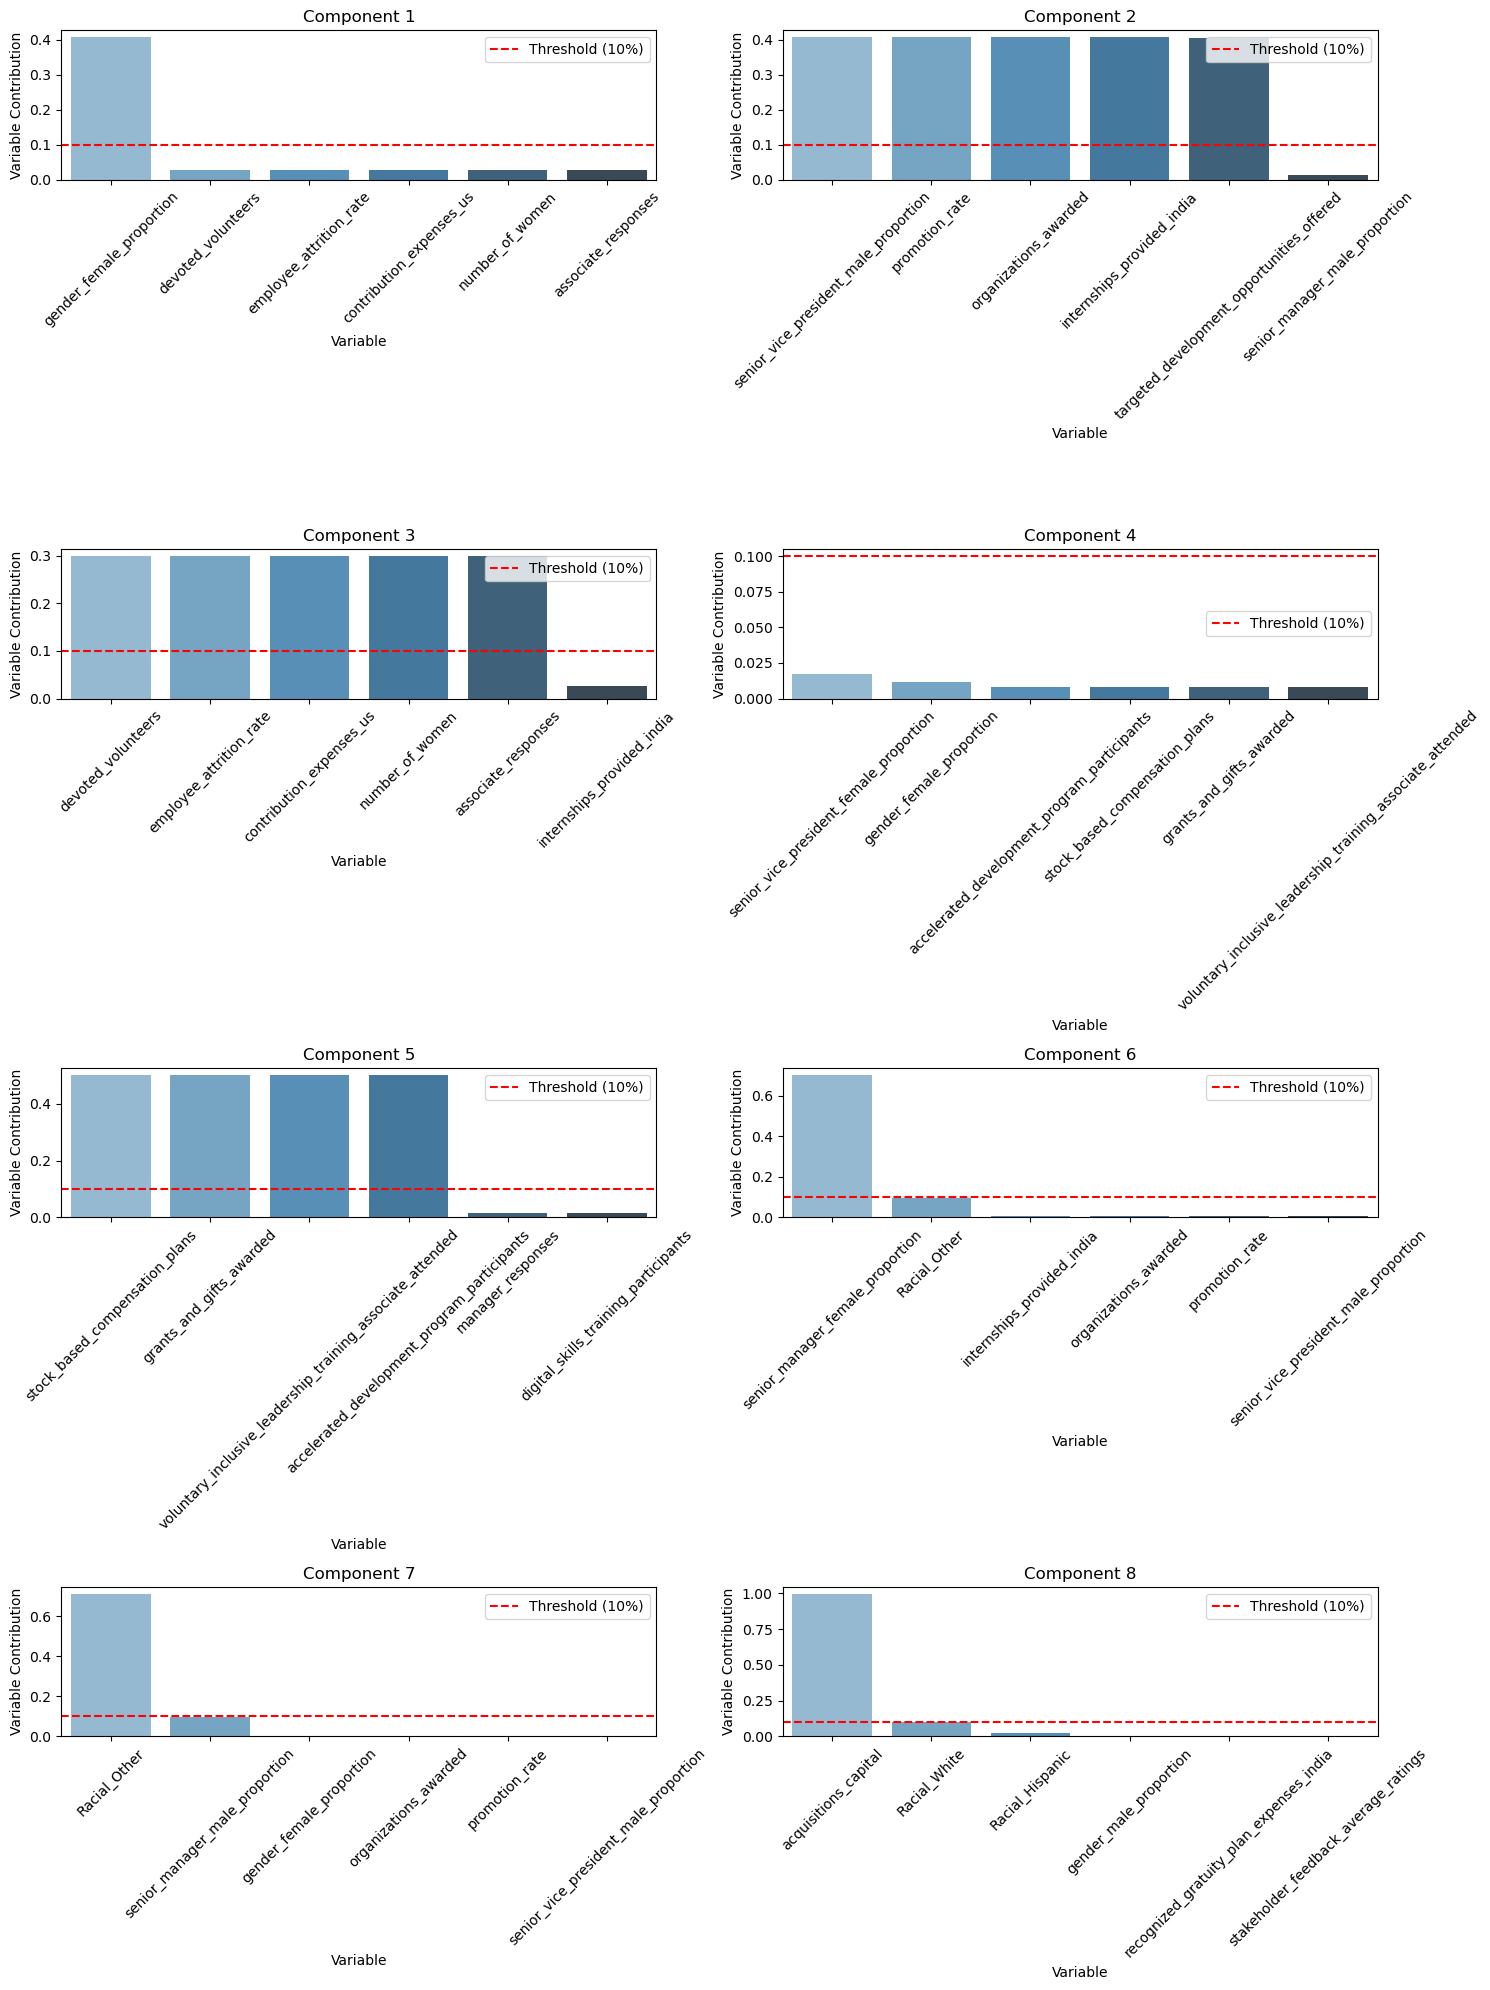

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

components = pca.components_[:8, :]  # Select the first 8 components
variables = x_train.columns

# Create 8 subplots for each component
plt.figure(figsize=(15, 20))

for i in range(8):
    plt.subplot(4, 2, i + 1)
    
    # Sort variables by their contribution to the component and select the top 6
    component_loadings = components[i]
    sorted_indices = component_loadings.argsort()[::-1][:6]  # Select the top 6
    sorted_variables = [variables[j] for j in sorted_indices]
    sorted_loadings = component_loadings[sorted_indices]

    # Plot variable distribution
    sns.barplot(x=sorted_variables, y=sorted_loadings, palette="Blues_d")

    # Add a threshold line at 10%
    plt.axhline(y=0.1, color='red', linestyle='--', label='Threshold (10%)')

    plt.title(f'Component {i + 1}')
    plt.xlabel('Variable')
    plt.ylabel('Variable Contribution')
    plt.xticks(rotation=45)  # Rotate variable names for better readability
    plt.legend()
    plt.tight_layout()

plt.show()

> **Using 8 Components to Build a Linear Model**<a class="anchor" id="section-4-1-1"></a>
- Now, we use these 8 components(X) to train a linear model against social score(Y), let's see what relationship between these components and the social performance.


- We aim to create a model that can make prediction on social performance aspect, when new data comes in we can leverage data to evaluate cognizant's social performance through this pipline we had built.

In [68]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data with the 8 principal components
lm_model = lr.fit(train_pca_df, y_train)

# Predict the target variable for the test data
y_pred = lm_model.predict(test_pca_df)

# Ensure that predictions are within the range [1, 5]
y_pred_clipped = np.clip(y_pred, 1, 5)

# Round the clipped predictions to one decimal place
y_pred_rounded = np.round(y_pred_clipped, 1)

> **Model Evaluation**<a class="anchor" id="section-4-1-2"></a>

> Coefficients 
- The coefficients associated with each feature represent the change in the target variable for a one-unit change in that feature while keeping other variables constant. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship. The magnitude of the coefficient reflects the strength of the relationship.

In [69]:
print(lm_model.coef_)

[ 0.24214263 -0.30549034  2.71301181 -2.98741226 -0.0595657  -0.00645624
 -0.01067915  0.02336609]


> R-squared (R2) Score
- The R-squared score measures the proportion of the variance in the target variable that is explained by the model. A higher R-squared indicates a better fit. It can help assess how well the model captures the variation in the data.

In [70]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rounded)
print(f"R-squared: {r2}")

R-squared: 0.991339761085305


> Mean Squared Error (MSE)

In [71]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_rounded)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.010429333333333334


> Root Mean Squared Error (RMSE)

In [72]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.10212410750324007


> Model Performance (Actual vs. Predicted Values)

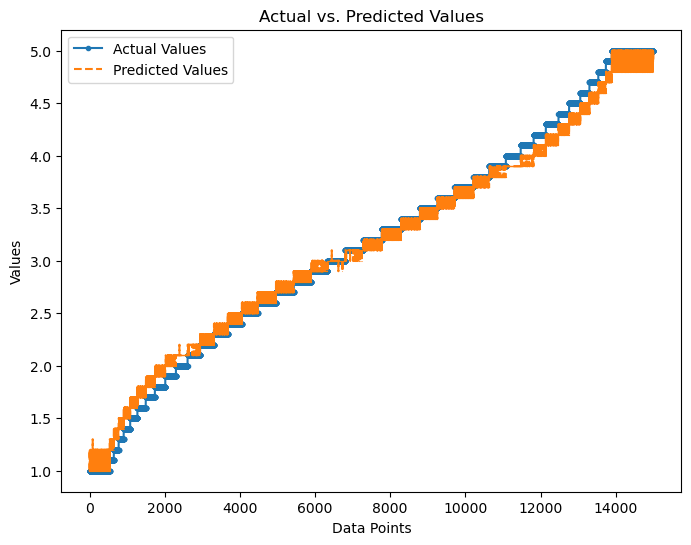

In [73]:
import matplotlib.pyplot as plt

# Sort the actual and predicted values by the actual values
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred_rounded[sorted_indices]

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label="Actual Values", marker='o', markersize=3, linestyle='-')
plt.plot(range(len(y_pred_sorted)), y_pred_sorted, label="Predicted Values", marker='x', markersize=0.1, linestyle='--')

# Add labels and legend
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the chart
plt.show()

> Residual Plots

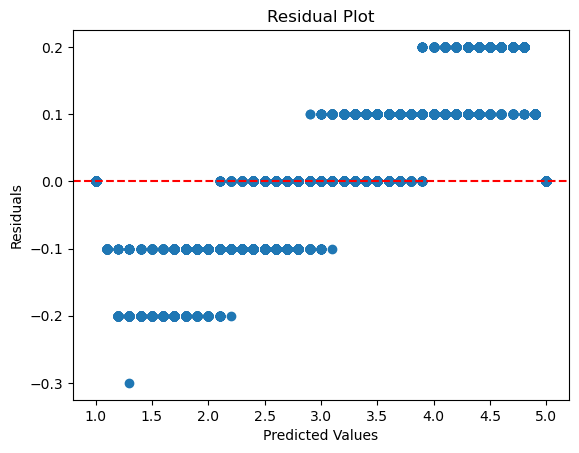

In [74]:
residuals = y_test - y_pred_rounded
plt.scatter(y_pred_rounded, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

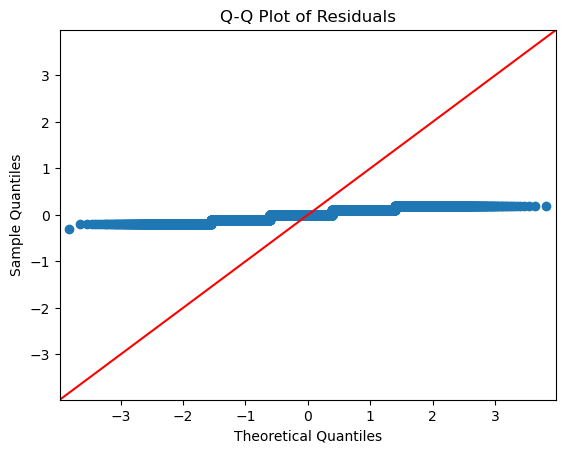

In [75]:
# Q-Q Plot of Residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

> 10 Folds (k) for cross-validation

In [76]:
from sklearn.model_selection import cross_val_score, KFold

# Specify the number of folds (k)
k = 10  # Adjust this as needed

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Perform k-fold cross-validation and collect the R-squared scores
cross_val_scores = cross_val_score(lr, train_pca_df, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: R-squared = {score:.3f}")

# Calculate the average R-squared score across all folds
average_r2 = cross_val_scores.mean()
print(f"Average R-squared = {average_r2:.3f}")

Fold 1: R-squared = 0.970
Fold 2: R-squared = 0.976
Fold 3: R-squared = 0.973
Fold 4: R-squared = 0.973
Fold 5: R-squared = 0.974
Fold 6: R-squared = 0.970
Fold 7: R-squared = 0.972
Fold 8: R-squared = 0.971
Fold 9: R-squared = 0.973
Fold 10: R-squared = 0.975
Average R-squared = 0.973


> **Model Interpretation**<a class="anchor" id="section-4-1-3"></a>

In [77]:
#pip install statsmodels

In [78]:
import statsmodels.api as sm

# Reset the indices of the target variable and feature data
y_train.reset_index(drop=True, inplace=True)
train_pca_df.reset_index(drop=True, inplace=True)

# Add a constant term (intercept) to your features
X_train = sm.add_constant(train_pca_df)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# View the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           social_score   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.554e+05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:58:33   Log-Likelihood:                 10173.
No. Observations:               35000   AIC:                        -2.033e+04
Df Residuals:                   34991   BIC:                        -2.025e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1908      0.001   3298.744      0.0

> **Future Prediction Pipline on New Data**<a class="anchor" id="section-4-1-4"></a>

When new data comes in, here are the pipline to process and make a prediction on social performance

In [79]:
# Take a random data point as new data
new_data = df.iloc[99:102, :]

# Drop the first column (assuming 'score' is the first column)
new_data_df = new_data.iloc[:, 1:]

# Display the new_data_df
new_data_df

,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
99,131071,0.368525,0.632000,0.368000,0.895398,0.104602,0.834475,0.165525,0.639731,0.251739,...,8275,3.750657,12901,30640,43479,124915,6760,2.122573e+07,1.195703e+08,1.094869e+09
100,113781,0.383526,0.632718,0.367282,0.884441,0.115559,0.829735,0.170265,0.634747,0.244007,...,8626,3.756397,12888,19344,33944,171056,6846,2.100961e+07,1.103879e+08,9.071187e+08
101,139020,0.400406,0.618074,0.381926,0.884456,0.115544,0.827678,0.172322,0.682581,0.306459,...,9020,3.639278,12890,19361,47863,222979,5089,2.104026e+07,1.104010e+08,4.772026e+08


In [80]:
# Standardize the new data point using the same MinMaxScaler
new_data_standardized = pd.DataFrame(scaler.transform(new_data_df), columns=new_data_df.columns)
new_data_standardized

,number_of_women,new_female_hires,gender_male_proportion,gender_female_proportion,senior_vice_president_male_proportion,senior_vice_president_female_proportion,senior_manager_male_proportion,senior_manager_female_proportion,Racial_Asian,Racial_White,...,manager_responses,stakeholder_feedback_average_ratings,voluntary_inclusive_leadership_training_associate_attended,internships_provided_india,devoted_volunteers,volunteering_hours,trained_associates,grants_and_gifts_awarded,organizations_awarded,acquisitions_capital
0,0.586954,0.344827,0.573332,0.426668,0.654722,0.345278,0.724597,0.275403,0.541482,0.429152,...,0.344943,0.573332,0.440501,0.654720,0.586957,0.344827,0.573339,0.440175,0.654722,0.570674
1,0.450650,0.491923,0.580353,0.419647,0.531026,0.468974,0.514023,0.485977,0.529805,0.400597,...,0.492237,0.580353,0.426931,0.531023,0.450653,0.491923,0.580351,0.426612,0.531026,0.513747
2,0.649620,0.657452,0.437110,0.562890,0.531202,0.468798,0.422674,0.577326,0.641873,0.631242,...,0.657574,0.437110,0.429019,0.531209,0.649627,0.657452,0.437097,0.428536,0.531202,0.383394


In [81]:
# Apply the PCA transformation to the standardized data
new_data_pca = pca.transform(new_data_standardized)

# Create a DataFrame with the 8 principal components
new_data_pca_df = pd.DataFrame(new_data_pca, columns=[f'PC{i+1}' for i in range(8)])
new_data_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.122106,0.414096,0.439475,0.100361,-0.079063,-0.271017,0.033762,0.075762
1,-0.171458,0.135891,-0.025647,0.115564,-0.091375,0.023613,0.016722,0.018224
2,0.196898,0.104031,-0.021868,-0.451251,-0.079332,0.117854,-0.262780,-0.097514


In [82]:
# Predict the target variable for the new data
new_pred = lm_model.predict(new_data_pca_df)

# Ensure that predictions are within the range [1, 5]
new_pred_clipped = np.clip(new_pred, 1, 5)

# Round the clipped predictions to one decimal place
new_pred_rounded = np.round(new_pred_clipped, 1)

> Final Social Score

In [83]:
# Round the values in the NumPy array to two decimal places
new_pred_rounded = new_pred_rounded.round(1)

# Convert the NumPy array to a list for formatting
new_pred_list = new_pred_rounded.tolist()

# Print the formatted values
formatted_values = ", ".join(f"{val:.1f}" for val in new_pred_list)
print(f"New Data Social Score: {formatted_values}")

New Data Social Score: 3.9, 2.7, 4.5


> **Visulization: Heat Mapping**<a class="anchor" id="section-4-1-5"></a>

Correlation Heatmap between Predicted Score and PCA Components (Test Data)

In [84]:
import pandas as pd

# Concatenate the PCA components DataFrame and the target variable for the test data
combined_test_data = pd.concat([new_data_pca_df, pd.Series(new_pred_clipped, name="score")], axis=1)

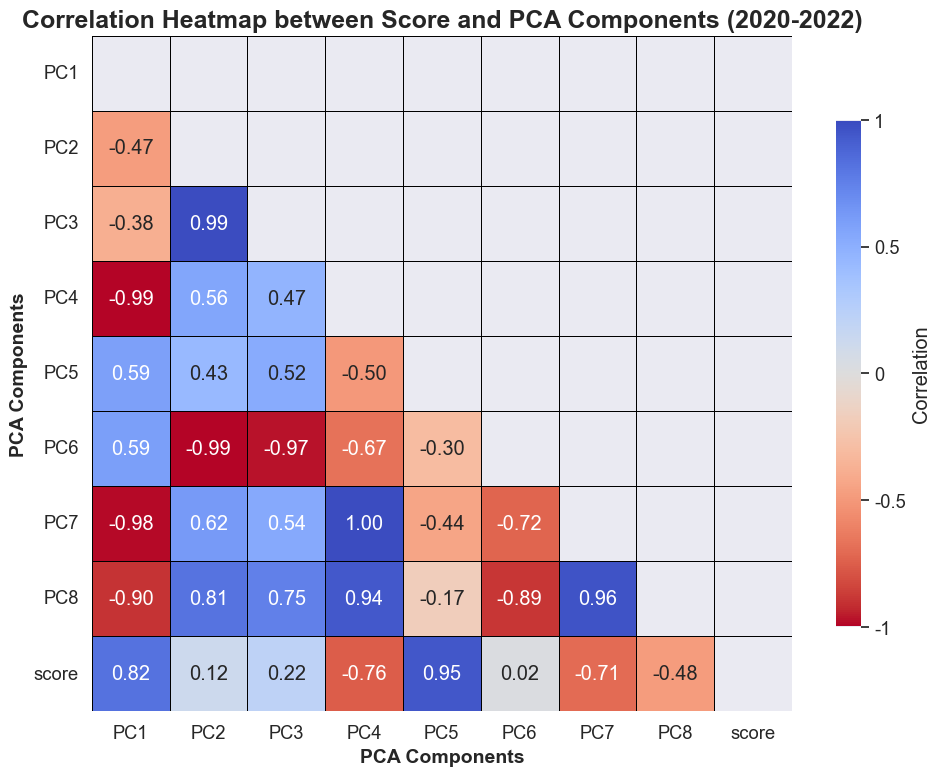

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a correlation matrix for the test data
correlation_matrix_test = combined_test_data.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_test, dtype=bool))

# Set a custom color palette with improved contrast
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
custom_palette = custom_palette.reversed()

# Set a larger font size for the annotations
sns.set(font_scale=1.2)

# Create a heatmap with customized aesthetics and the mask
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix_test, annot=True, cmap=custom_palette, fmt=".2f",
                      cbar_kws={"shrink": 0.75, "label": "Correlation"}, 
                      linewidths=0.5, linecolor="black", mask=mask)

# Modify the color bar ticks and labels
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])

# Add a title with larger font size and style
plt.title("Correlation Heatmap between Score and PCA Components (2020-2022)", fontsize=18, fontweight='bold')

# Set the axis labels and improve readability
plt.xlabel("PCA Components", fontsize=14, fontweight='bold')
plt.ylabel("PCA Components", fontsize=14, fontweight='bold')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Display the updated heatmap
plt.tight_layout()
plt.show()


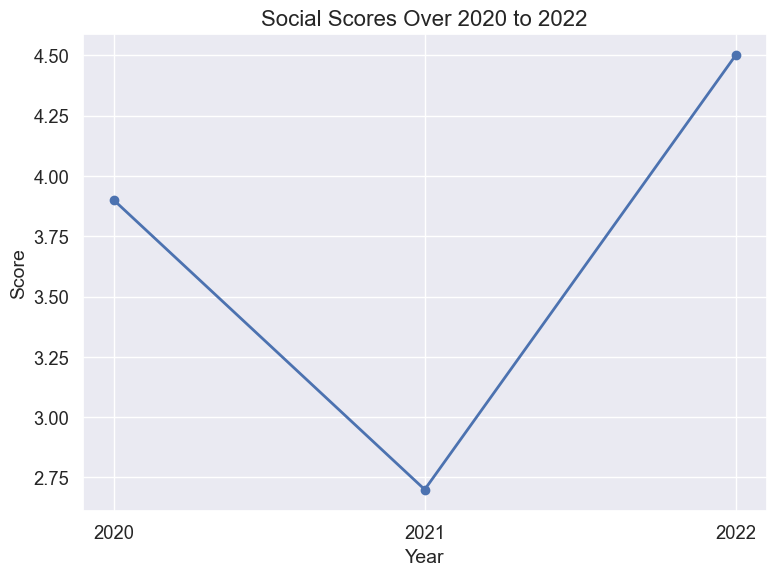

In [86]:
import matplotlib.pyplot as plt

years = [2020, 2021, 2022]
scores = [3.9, 2.7, 4.5]

plt.figure(figsize=(8, 6))
plt.plot(years, scores, marker='o', linestyle='-', color='b', linewidth=2)

plt.title('Social Scores Over 2020 to 2022', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(years)  # Set x-axis ticks to display only these years

plt.grid(True)
plt.tight_layout()
plt.show()